# Exploratory Data Analysis

## Importing libraries

In [1]:
import pandas as pd #basically pandas is used to perform different analysis on data
import numpy as np #Numpy stands for numperical python used to perform numerical calculation on the data
import seaborn as sns #Seaborn and matplotlib both are used to visualise the different insights of data
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
olist_customers_dataset=pd.read_csv("olist_customers_dataset.csv") 
olist_order_items_dataset=pd.read_csv("olist_order_items_dataset.csv")
olist_order_payments_dataset=pd.read_csv("olist_order_payments_dataset.csv")
olist_order_reviews_dataset=pd.read_csv("olist_order_reviews_dataset.csv")
olist_orders_dataset=pd.read_csv("olist_orders_dataset.csv")
olist_products_dataset=pd.read_csv("olist_products_dataset.csv")
olist_sellers_dataset=pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation=pd.read_csv("product_category_name_translation.csv")
olist_geolocation_dataset=pd.read_csv("olist_geolocation_dataset.csv")

In [3]:
merged_df = olist_orders_dataset.merge(olist_customers_dataset, on="customer_id", how="left")
merged_df = merged_df.merge(olist_order_reviews_dataset, on="order_id", how="left")
merged_df = merged_df.merge(olist_order_payments_dataset, on="order_id", how="left")
merged_df = merged_df.merge(olist_order_items_dataset, on="order_id", how="left")
merged_df = merged_df.merge(olist_products_dataset, on="product_id", how="left")
merged_df = merged_df.merge(olist_sellers_dataset, on="seller_id", how="left")

In [4]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

### Removing the outliers

In [5]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)  # First quartile
    Q3 = df.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
df_numeric = merged_df.select_dtypes(include=['number'])
df_cleaned = remove_outliers_iqr(df_numeric)

In [6]:
df_non_numeric = merged_df.select_dtypes(exclude=['number'])

In [7]:
df_cleaned['order_id'] = merged_df['order_id']

/tmp/ipykernel_18321/4049919004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['order_id'] = merged_df['order_id']


In [8]:
df_non_numeric['order_id'] = merged_df['order_id']

In [9]:
df = pd.merge(df_non_numeric, df_cleaned, how='inner', on='order_id')

### Handling the null values

In [10]:
df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   75
order_delivered_carrier_date       268
order_delivered_customer_date      541
order_estimated_delivery_date        0
customer_unique_id                   0
customer_city                        0
customer_state                       0
review_id                          518
review_comment_title             49828
review_comment_message           36188
review_creation_date               518
review_answer_timestamp            518
payment_type                         0
product_id                         162
seller_id                          162
shipping_limit_date                162
product_category_name             1158
seller_city                        162
seller_state                       162
customer_zip_code_prefix             0
review_score                       518
payment_sequential       

In [11]:
rows_with_nulls = merged_df[merged_df.isnull().any(axis=1)]

In [12]:
merged_df = merged_df.drop(columns=['review_comment_title'], errors='ignore')

In [13]:
df['product_name_lenght'] = df['product_name_lenght'].fillna(df['product_name_lenght'].mean())
df['product_description_lenght'] = df['product_description_lenght'].fillna(df['product_description_lenght'].mean())
df['product_photos_qty'] = df['product_photos_qty'].fillna(df['product_photos_qty'].mean())

In [14]:
df['product_weight_g'] = df['product_weight_g'].fillna(df['product_weight_g'].mean())
df['product_length_cm'] = df['product_length_cm'].fillna(df['product_length_cm'].mean())
df['product_height_cm'] = df['product_height_cm'].fillna(df['product_height_cm'].mean())
df['product_width_cm'] = df['product_width_cm'].fillna(df['product_width_cm'].mean())

### Mathematical description of the data

In [15]:
desc_stats=df.describe()
desc_stats

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,55711.000000,55193.000000,55711.0,55711.000000,55711.000000,55549.0,55549.000000,55549.000000,55711.000000,55711.000000,55711.000000,55711.000000,55711.000000,55711.000000,55711.000000,55549.000000
mean,32272.830464,4.575127,1.0,2.243363,95.283940,1.0,69.306801,14.800225,48.767970,623.108636,2.038479,765.958835,26.374354,12.676499,20.779969,12798.609462
std,29111.153356,0.668200,0.0,1.847791,66.395382,0.0,51.347380,4.861657,9.662505,388.420245,1.369699,742.748627,11.202806,7.857085,8.816765,9549.804386
min,1003.000000,3.000000,1.0,1.000000,0.000000,1.0,0.850000,1.010000,20.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000
25%,9220.000000,4.000000,1.0,1.000000,46.780000,1.0,29.990000,11.850000,43.000000,334.000000,1.000000,250.000000,17.000000,7.000000,14.000000,4782.000000
50%,22021.000000,5.000000,1.0,1.000000,76.210000,1.0,53.990000,15.100000,51.000000,549.000000,1.000000,500.000000,22.000000,11.000000,18.000000,13030.000000
75%,45027.500000,5.000000,1.0,3.000000,127.460000,1.0,90.490000,17.740000,57.000000,844.000000,3.000000,1100.000000,32.000000,17.000000,26.000000,14940.000000
max,99980.000000,5.000000,1.0,8.000000,381.570000,1.0,277.000000,33.310000,76.000000,1936.000000,6.000000,4050.000000,68.000000,38.000000,52.000000,60110.000000


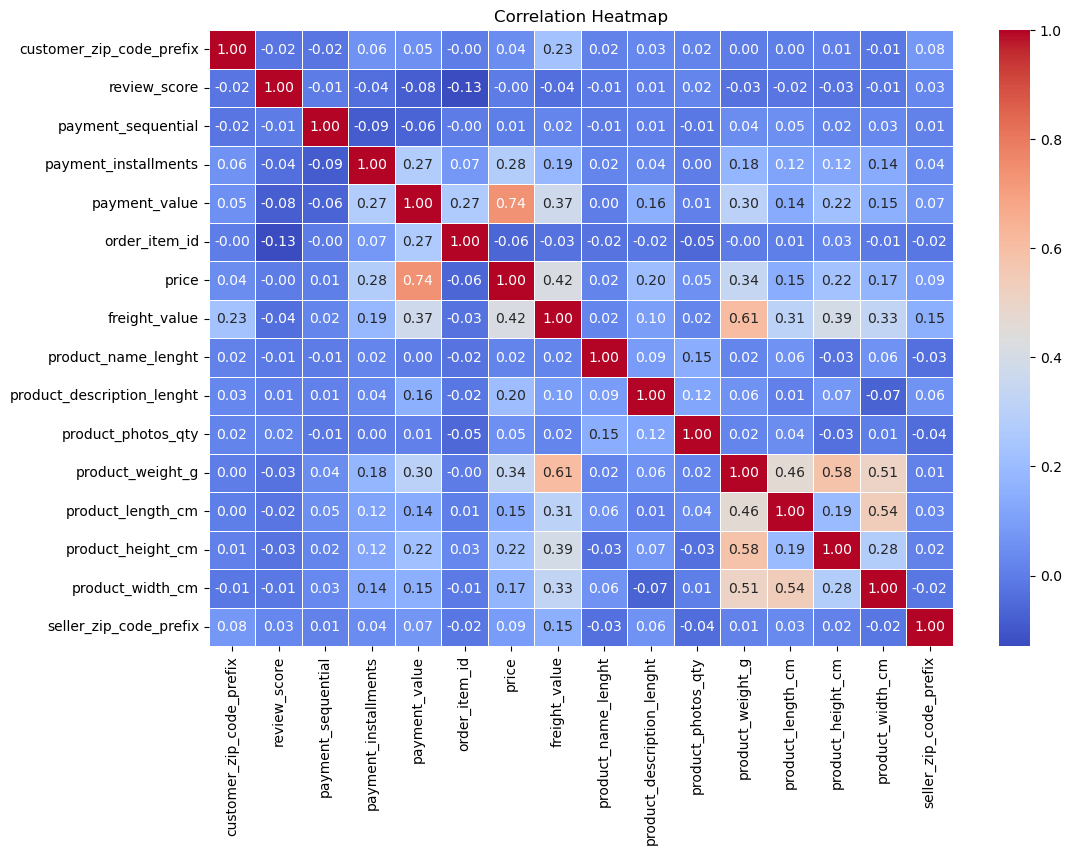

In [16]:
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

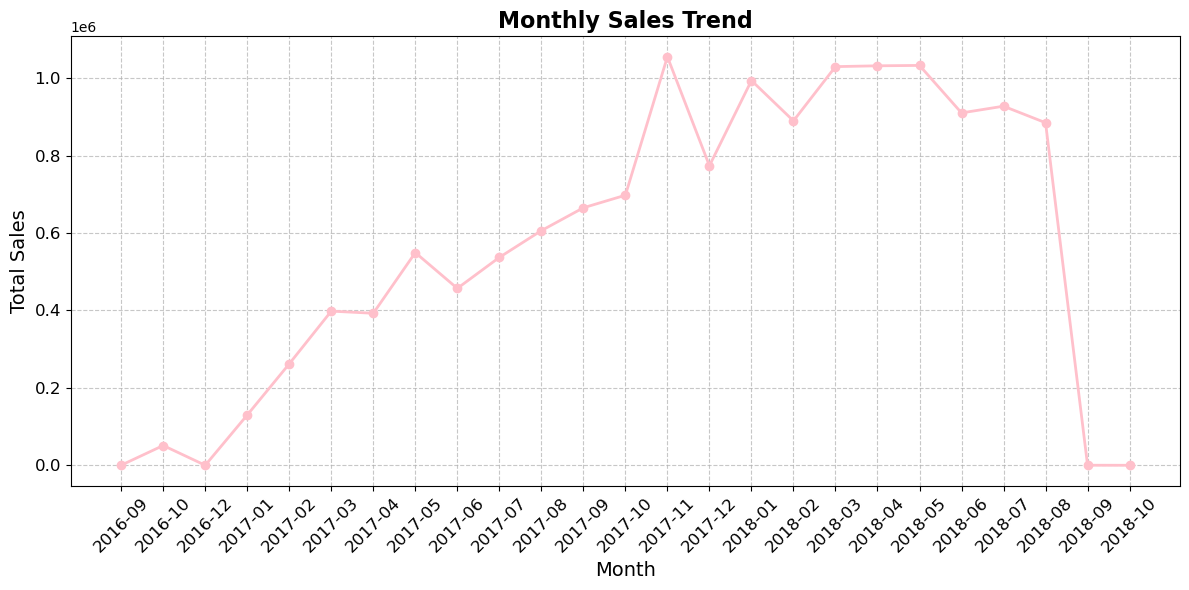

In [17]:
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], errors='coerce')

# Group by month and sum price
monthly_sales = merged_df.groupby(merged_df['order_purchase_timestamp'].dt.to_period('M')).agg({'price': 'sum'})
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str).to_numpy(), 
         monthly_sales['price'].to_numpy(), 
         marker='o', linestyle='-', color="pink", linewidth=2)
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_18321/2999322888.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_deliveries['order_estimated_delivery_date'] = pd.to_datetime(late_deliveries['order_estimated_delivery_date'])
/tmp/ipykernel_18321/2999322888.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_deliveries['order_delivered_customer_date'] = pd.to_datetime(late_deliveries['order_delivered_customer_date'])
/tmp/ipykernel_18321/2999322888.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

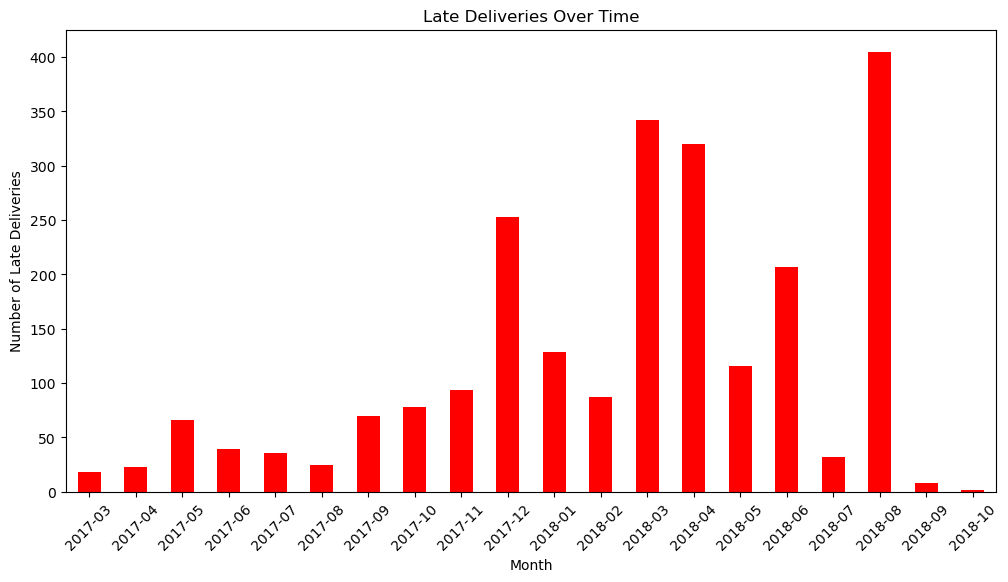

In [18]:
late_deliveries = df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']]
# Convert to datetime for better visualization
late_deliveries['order_estimated_delivery_date'] = pd.to_datetime(late_deliveries['order_estimated_delivery_date'])
late_deliveries['order_delivered_customer_date'] = pd.to_datetime(late_deliveries['order_delivered_customer_date'])
# Count late deliveries per month
late_deliveries['month'] = late_deliveries['order_delivered_customer_date'].dt.to_period('M')
late_deliveries_counts = late_deliveries['month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
late_deliveries_counts.plot(kind='bar', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Late Deliveries')
plt.title('Late Deliveries Over Time')
plt.xticks(rotation=45)
plt.show()

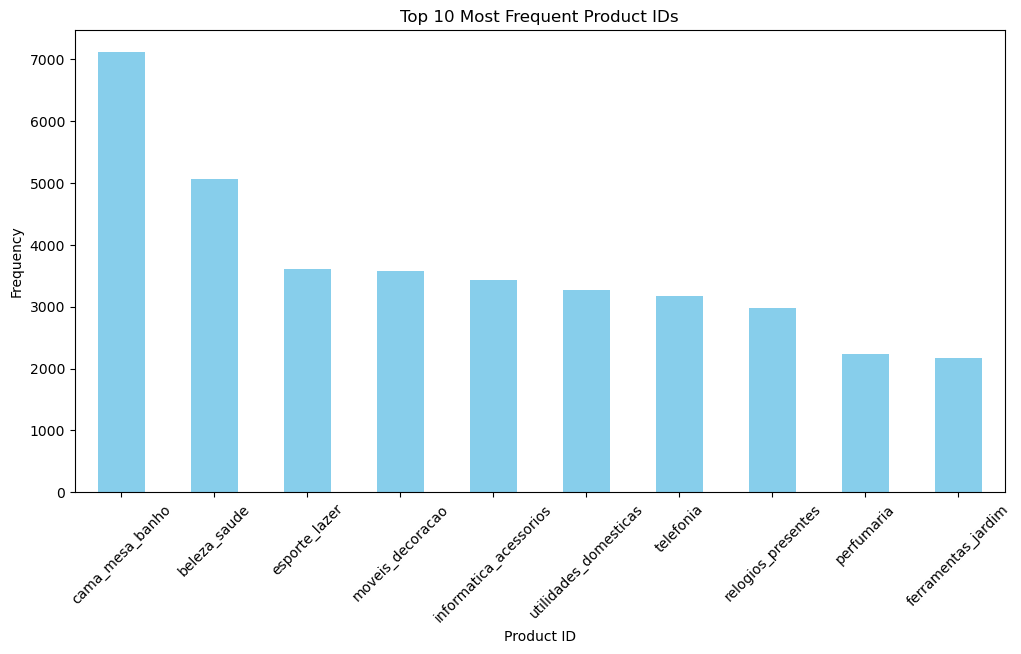

In [19]:
top_10_products = df['product_category_name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_10_products.plot(kind='bar', color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Product IDs')
plt.xticks(rotation=45)
plt.show()

In [20]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')  # 'coerce' to handle errors if there are any invalid dates
# Calculate delivery time (in days)
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['delivery_time']=df["delivery_time"].fillna(0)

In [21]:
df['payment_value'].mean()

95.28394033494283

In [22]:
df['payment_type'].value_counts()

payment_type
credit_card    39995
boleto         11516
voucher         3287
debit_card       912
not_defined        1
Name: count, dtype: int64

In [23]:
df.groupby('payment_installments')['payment_value'].mean()

payment_installments
1.0     80.808569
2.0    101.497545
3.0    105.402321
4.0    113.785156
5.0    121.819126
6.0    125.644358
7.0    122.330133
8.0    162.807193
Name: payment_value, dtype: float64

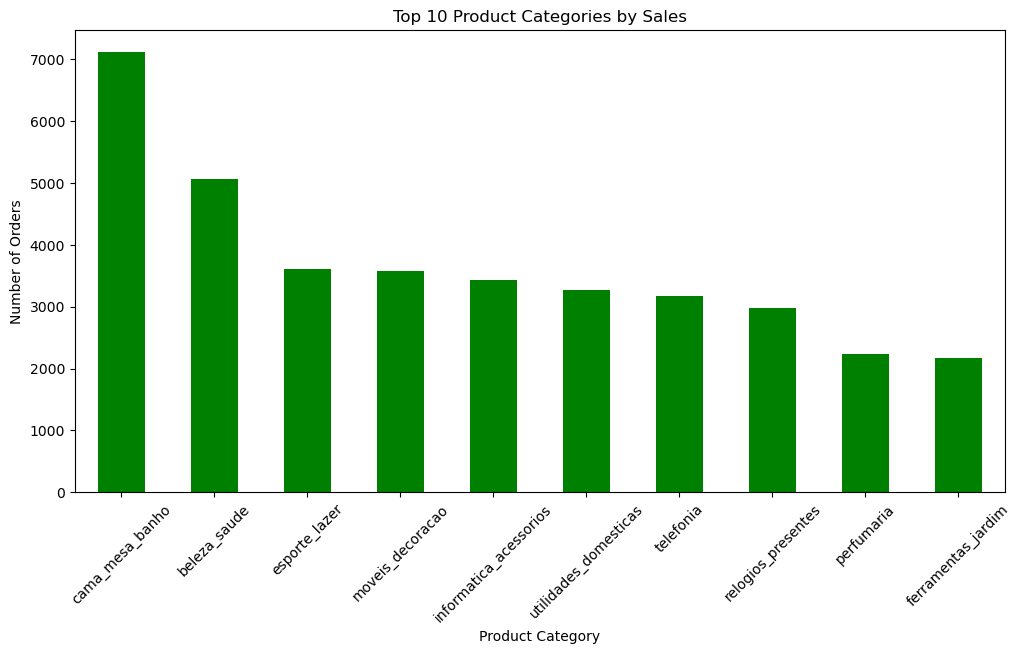

In [24]:
category_sales = df.groupby('product_category_name')['order_id'].count().sort_values(ascending=False).head(10)
category_sales.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

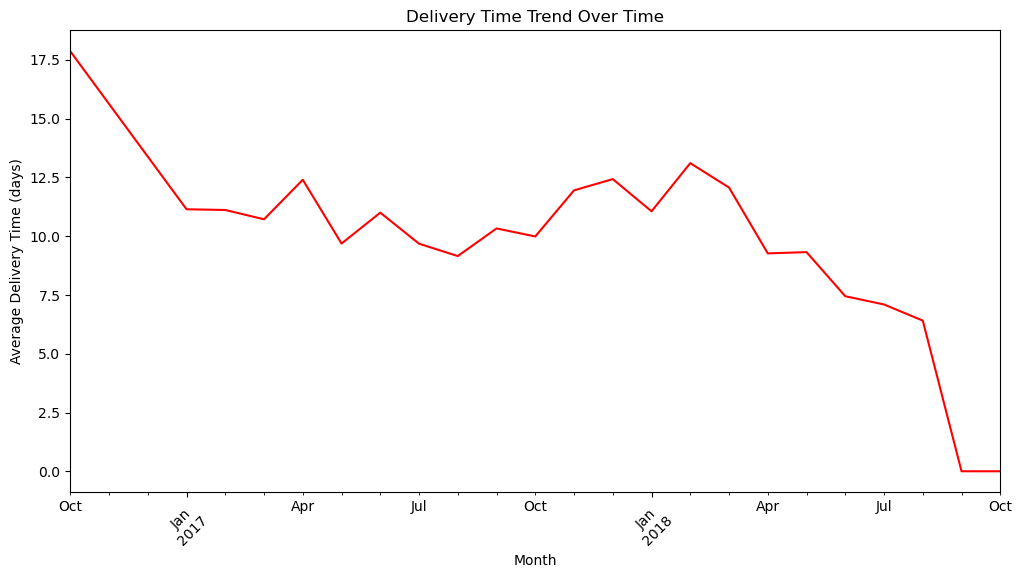

In [25]:
df['delivery_time'] = pd.to_numeric(df['delivery_time'], errors='coerce')  # Convert delivery time to numeric if necessary
df['month'] = df['order_purchase_timestamp'].dt.to_period('M')
delivery_trend = df.groupby('month')['delivery_time'].mean()
delivery_trend.plot(kind='line', figsize=(12, 6), color='red')
plt.title('Delivery Time Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=45)
plt.show()

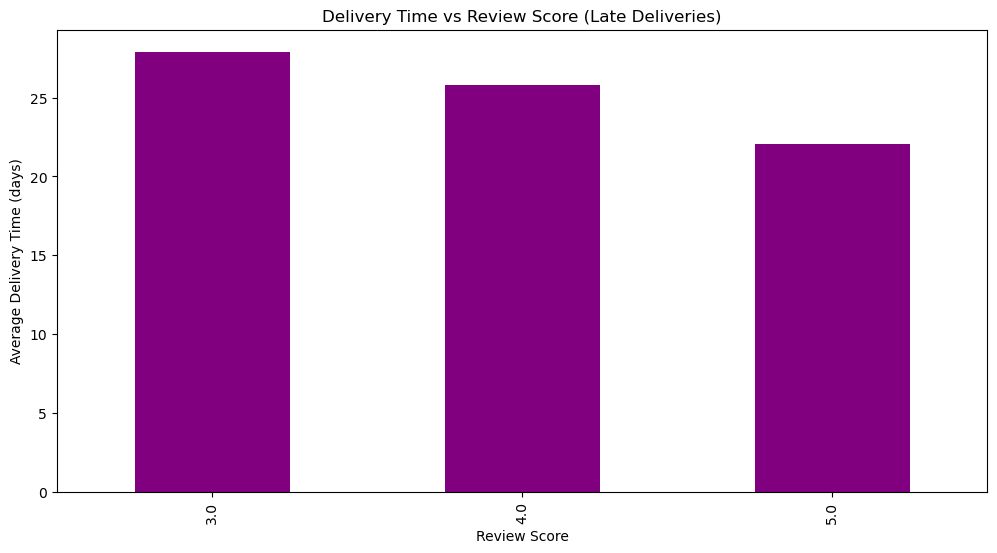

In [26]:
late_deliveries = df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']]
late_reviews = late_deliveries.groupby('review_score')['delivery_time'].mean()
late_reviews.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title('Delivery Time vs Review Score (Late Deliveries)')
plt.xlabel('Review Score')
plt.ylabel('Average Delivery Time (days)')
plt.show()


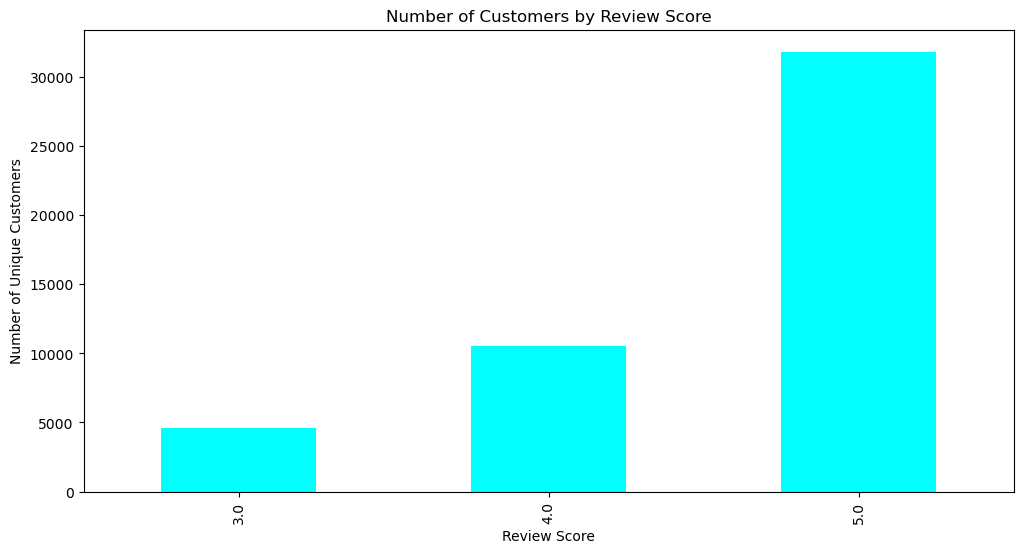

In [27]:
review_segmentation = df.groupby('review_score')['customer_id'].nunique()
review_segmentation.plot(kind='bar', figsize=(12, 6), color='cyan')
plt.title('Number of Customers by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Number of Unique Customers')
plt.show()


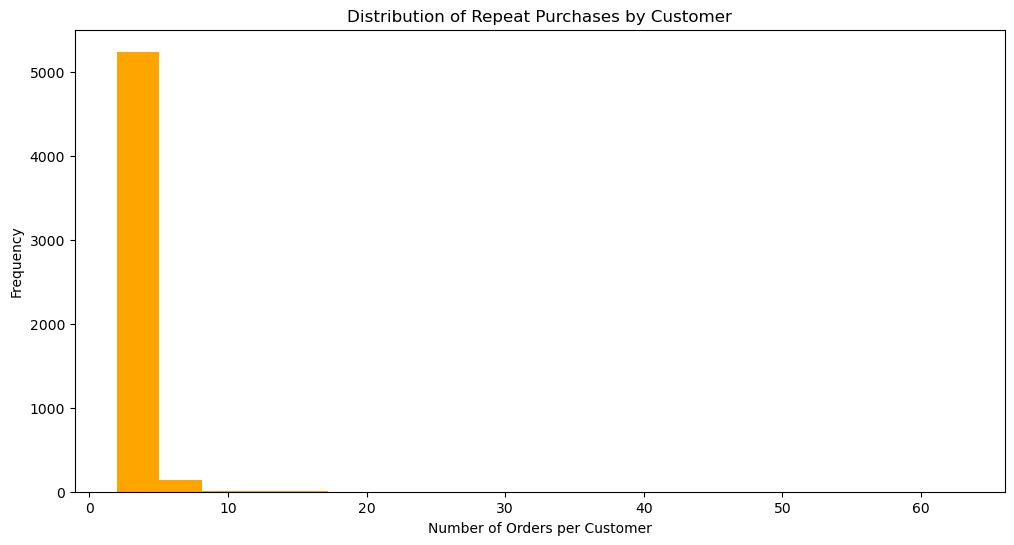

In [28]:
repeat_customers = df.groupby('customer_id')['order_id'].count()
repeat_customers = repeat_customers[repeat_customers > 1]  # Customers with more than one purchase
repeat_customers.plot(kind='hist', bins=20, figsize=(12, 6), color='orange')
plt.title('Distribution of Repeat Purchases by Customer')
plt.xlabel('Number of Orders per Customer')
plt.ylabel('Frequency')
plt.show()

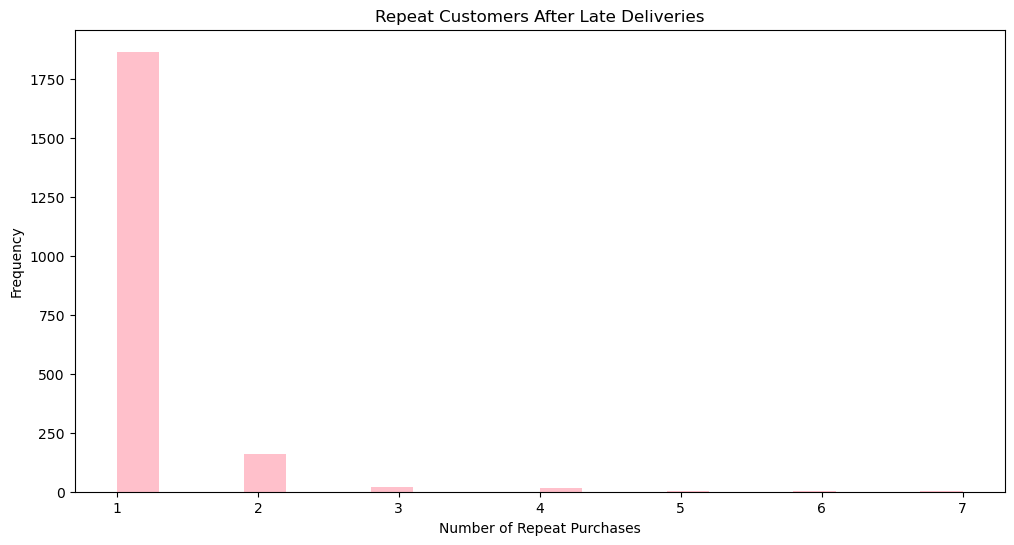

In [29]:
late_repeat_customers = late_deliveries['customer_id'].value_counts()
late_repeat_customers.plot(kind='hist', bins=20, figsize=(12, 6), color='pink')
plt.title('Repeat Customers After Late Deliveries')
plt.xlabel('Number of Repeat Purchases')
plt.ylabel('Frequency')
plt.show()

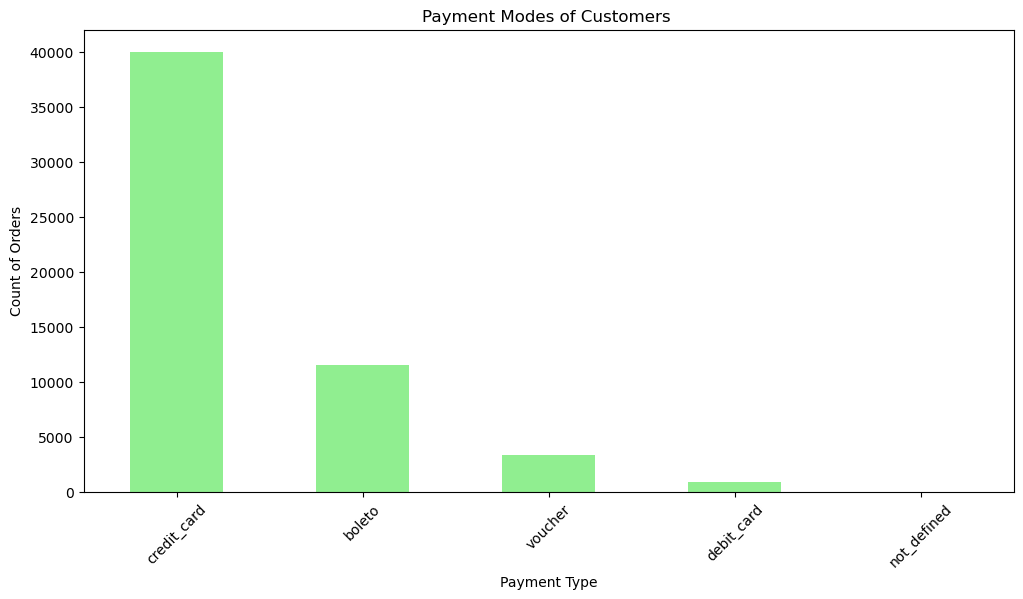

In [30]:
# Grouped by payment type to find which payment is most used
payment_mode_distribution = df['payment_type'].value_counts()
payment_mode_distribution.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Payment Modes of Customers ')
plt.xlabel('Payment Type')
plt.ylabel('Count of Orders')
plt.xticks(rotation=45)
plt.show()


In [31]:
# Converted date columns to datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Calculated delivery time in days
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Grouped by customer location (City or State) and found the fastest average delivery time
fastest_delivery_city = df.groupby('customer_city')['delivery_time_days'].mean().idxmin()
fastest_delivery_time = df.groupby('customer_city')['delivery_time_days'].mean().min()

fastest_delivery_state = df.groupby('customer_state')['delivery_time_days'].mean().idxmin()
fastest_delivery_state_time = df.groupby('customer_state')['delivery_time_days'].mean().min()

print(f"Fastest Delivery City: {fastest_delivery_city} ({fastest_delivery_time:.2f} days)")
print(f"Fastest Delivery State: {fastest_delivery_state} ({fastest_delivery_state_time:.2f} days)")


Fastest Delivery City: buenopolis (3.00 days)
Fastest Delivery State: SP (7.00 days)


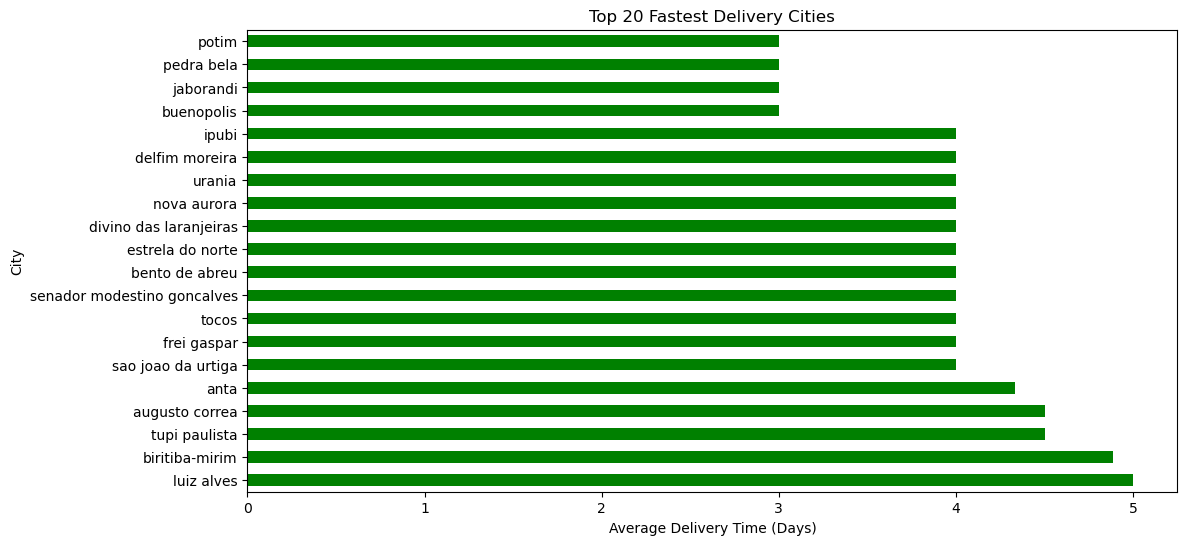

In [32]:
# Grouped by customer city and calculated average delivery time
city_delivery_times = df.groupby('customer_city')['delivery_time_days'].mean().sort_values()

plt.figure(figsize=(12, 6))
city_delivery_times.head(20).plot(kind='barh', color='green')

plt.title('Top 20 Fastest Delivery Cities')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('City')
plt.gca().invert_yaxis() 
plt.show()


/tmp/ipykernel_18321/1189480307.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_delivery_times.index, y=state_delivery_times.values, palette="coolwarm")


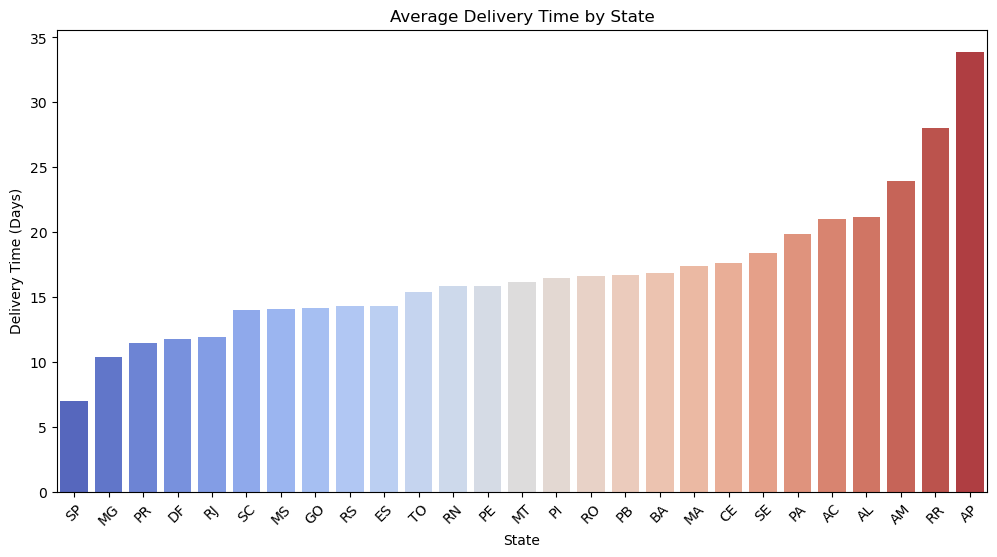

In [33]:
# Grouped by state and calculated average delivery time
state_delivery_times = df.groupby('customer_state')['delivery_time_days'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_delivery_times.index, y=state_delivery_times.values, palette="coolwarm")

plt.title('Average Delivery Time by State')
plt.xlabel('State')
plt.ylabel('Delivery Time (Days)')
plt.xticks(rotation=45)
plt.show()


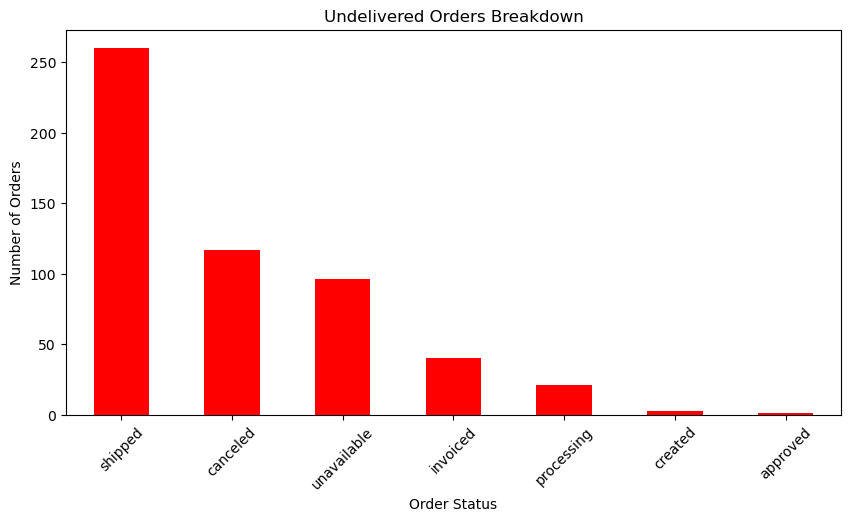

In [34]:
#Checked how many orders are only shipped not delivered
undelivered_counts = df[df['order_status'] != 'delivered']['order_status'].value_counts()
undelivered_counts.plot(kind='bar', color='red', figsize=(10, 5))

plt.title('Undelivered Orders Breakdown')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


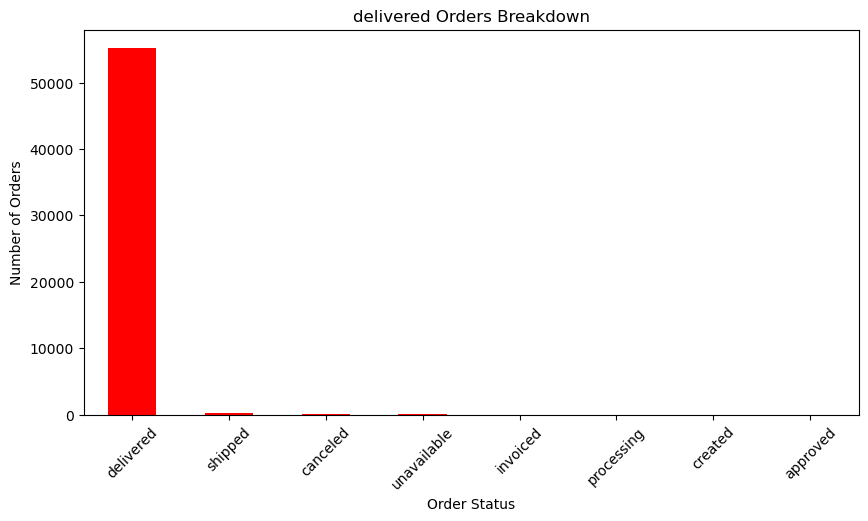

In [35]:
#Checked the rate of delivered which is very high
delivered_counts = df['order_status'].value_counts()
delivered_counts.plot(kind='bar', color='red', figsize=(10, 5))

plt.title('delivered Orders Breakdown')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


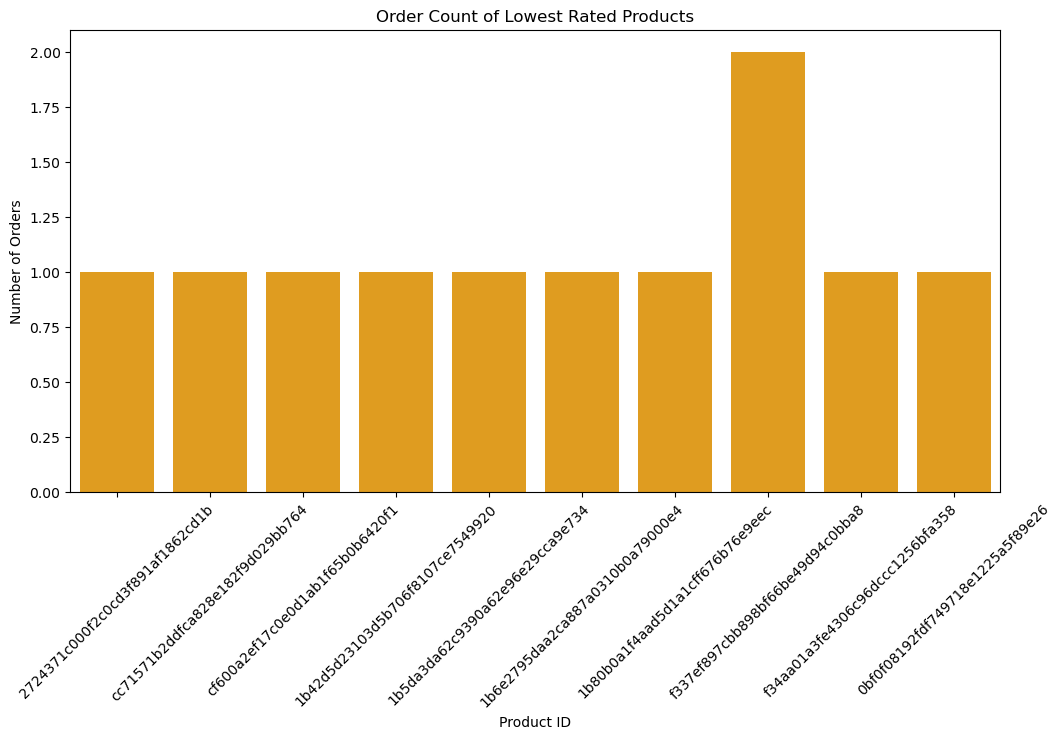

In [36]:
# Grouped by product id and calculated the average rating and order count
product_ratings = df.groupby('product_id').agg(
    avg_rating=('review_score', 'mean'),
    order_count=('product_id', 'count')  # Counted how many times the product appears
).sort_values('avg_rating')

# Selected the bottom 10 lowest-rated products
lowest_rated_products = product_ratings.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=lowest_rated_products.index, y=lowest_rated_products['order_count'], color="orange")

plt.title('Order Count of Lowest Rated Products')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

plt.show()
